<a href="https://colab.research.google.com/github/danielopezr/COMPETENCIA_AI4ENG_UDEA_2025-2/blob/main/02%20-%20preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **02 - Preprocesado**

## **Importación de librerías**

In [ ]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
import unicodedata

## **Carga del dataset**

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.39GB/s]


In [ ]:
!unzip udea*.zip > /dev/null

In [ ]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185238 test.csv
   692501  10666231 143732437 train.csv
  1286075  15528571 207634348 total


In [ ]:
df = pd.read_csv("train.csv")
df.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


## **Funciones auxiliares**

In [ ]:
def viewValues(df, column):
    """
    Muestra un gráfico de barras con la frecuencia de valores de una columna en un DataFrame.

    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        column (str): Nombre de la columna a analizar.
    """
    counts = df[column].fillna("null", inplace=False).value_counts()

    ax = counts.plot(kind='bar')

    for i, value in enumerate(counts):
        ax.text(i, value, str(value), ha='center', va='bottom')

    plt.title(f"Frecuencia de valores en '{column}'")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()

In [ ]:
def fillDefault(df, column, value):
    """
    Rellena los valores nulos de una columna en un DataFrame con un valor por defecto.

    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        column (str): Nombre de la columna a modificar.
        value (any): Valor con el que se reemplazarán los nulos.

    Returns:
        None: Modifica el DataFrame directamente.
    """
    df[column] = df[column].fillna(value)

In [ ]:
def compareDiscreteValues(df, column, target='RENDIMIENTO_GLOBAL'):
    """
    Compara la distribución de un valor objetivo respecto a una variable categórica
    mediante una tabla cruzada y un mapa de calor.

    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        column (str): Nombre de la columna categórica a comparar.
        target (str, opcional): Columna objetivo para el análisis. Por defecto 'RENDIMIENTO_GLOBAL'.

    Returns:
        None: Muestra un mapa de calor con la distribución de frecuencias.
    """
    comparison = pd.crosstab(
        df[column].fillna("null"),
        df[target]
    )

    plt.figure(figsize=(10, 5))
    sns.heatmap(
        comparison,
        annot=True,
        fmt="d",
        linewidths=0.5
    )

    plt.title(f"Distribución de '{target}' por categoría en '{column}'")
    plt.xlabel(target)
    plt.ylabel(column)
    plt.show()

In [ ]:
def replaceNullByList(df, column, values):
    """
    Reemplaza los valores nulos de una columna en un DataFrame con valores aleatorios de una lista dada.

    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        column (str): Nombre de la columna a modificar.
        values (list): Lista de valores posibles para reemplazar los nulos.

    Returns:
        None: Modifica el DataFrame directamente.
    """
    numNulls = df[column].isna().sum()
    randomReplaces = np.random.choice(values, size=numNulls, replace=True)
    df.loc[df[column].isna(), column] = randomReplaces

In [ ]:
def getDistincValues(df, column):
    """
    Obtiene una lista de valores únicos no nulos de una columna en un DataFrame.

    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        column (str): Nombre de la columna a analizar.

    Returns:
        list: Lista de valores distintos sin incluir nulos.
    """
    return df[column].dropna().unique().tolist()

In [ ]:
def onehotEncode(df, column):
    """
    Aplica codificación one-hot manual a una columna categórica de un DataFrame.

    Crea nuevas columnas binarias (0 o 1) por cada valor único en la columna original,
    y luego elimina la columna original del DataFrame.

    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        column (str): Nombre de la columna a codificar.

    Returns:
        pandas.DataFrame: DataFrame con las nuevas columnas codificadas y sin la columna original.
    """
    values = df[column].unique().tolist()

    for value in values:
        df[column + '_' + value] = (df[column] == value).astype(int)

    df.drop(columns=[column], inplace=True)
    return df

In [ ]:
def percentagePositives(df, roundVal=4):
    """
    Calcula e imprime el porcentaje de valores positivos (1) en las columnas numéricas de un DataFrame.

    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos numéricos.
        roundVal (int, opcional): Número de decimales para redondear los porcentajes. Por defecto 4.

    Returns:
        None: Imprime en pantalla el porcentaje de valores positivos por columna.
    """
    print(df._get_numeric_data().mean().round(roundVal) * 100)

In [ ]:
def formatText(df, column):
    """
    Elimina los acentos de los valores de texto en una columna de un DataFrame.

    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        column (str): Nombre de la columna a formatear.

    Returns:
        None: Modifica directamente la columna del DataFrame.
    """
    def removeAccents(text):
        if isinstance(text, str):
            return ''.join(
                c for c in unicodedata.normalize('NFKD', text)
                if not unicodedata.combining(c)
            )
        return text

    df[column] = df[column].apply(removeAccents)

In [ ]:
def valuesPercentage(df, column):
    """
    Calcula el porcentaje de frecuencia de cada valor en una columna de un DataFrame.

    Aplica la función `formatText` para eliminar acentos antes del cálculo.

    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        column (str): Nombre de la columna a analizar.

    Returns:
        pandas.Series: Serie con los porcentajes de aparición de cada valor.
    """
    df = df.copy()
    formatText(df, column)
    percentages = (df[column].value_counts(normalize=True) * 100).round(2)
    return percentages

In [ ]:
def valuesFilterSignificance(df, column, min_percentage, printInfo=True):
    """
    Filtra los valores de una columna según un porcentaje mínimo de aparición.

    Usa `valuesPercentage` para calcular la frecuencia relativa de cada valor y
    conserva solo aquellos que superen el umbral especificado.

    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        column (str): Nombre de la columna a analizar.
        min_percentage (float): Porcentaje mínimo requerido para conservar un valor.
        printInfo (bool, opcional): Si es True, muestra información sobre los valores filtrados.
            Por defecto True.

    Returns:
        pandas.Series: Serie con los valores y sus porcentajes que cumplen el criterio.
    """
    percentages = valuesPercentage(df, column)
    filtered = percentages[percentages >= min_percentage]

    if printInfo:
        print(filtered)
        print("Porcentaje acumulado: ", filtered.sum())
        print("Número de valores: ", filtered.shape[0])

    return filtered

In [ ]:
def groupValuesByPercentage(df, column, min_percentage, valueGroup='Otros'):
    """
    Agrupa en una misma categoría los valores de una columna cuyo porcentaje de aparición
    sea menor al umbral especificado.

    Utiliza `valuesFilterSignificance` para identificar los valores significativos
    y reemplaza los menos frecuentes por una etiqueta genérica (por defecto 'Otros').

    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        column (str): Nombre de la columna a procesar.
        min_percentage (float): Porcentaje mínimo para considerar un valor como significativo.
        valueGroup (str, opcional): Nombre de la categoría donde se agruparán los valores poco frecuentes.
            Por defecto 'Otros'.

    Returns:
        None: Modifica directamente la columna del DataFrame.
    """
    formatText(df, column)
    filtered = valuesFilterSignificance(df, column, min_percentage, printInfo=False)
    values_to_keep = filtered.index.tolist()
    df.loc[~df[column].isin(values_to_keep), column] = valueGroup

In [ ]:
def groupValuesByList(df, column, valuesToGroup, valueGroup='Otros'):
    """
    Agrupa en una misma categoría los valores de una columna que pertenezcan a una lista dada.

    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        column (str): Nombre de la columna a modificar.
        valuesToGroup (list): Lista de valores que serán reemplazados por la categoría genérica.
        valueGroup (str, opcional): Nombre de la categoría donde se agruparán los valores especificados.
            Por defecto 'Otros'.

    Returns:
        None: Modifica directamente la columna del DataFrame.
    """
    df.loc[df[column].isin(valuesToGroup), column] = valueGroup

In [ ]:
def printUniqueValues(df, column, format=False):
    """
    Imprime los valores únicos de una columna en un DataFrame y su cantidad total.

    Si `format` es True, aplica la función `formatText` antes de obtener los valores únicos.

    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        column (str): Nombre de la columna a analizar.
        format (bool, opcional): Si es True, elimina acentos antes de mostrar los valores.
            Por defecto False.

    Returns:
        None: Imprime los valores únicos y su cantidad.
    """
    if format:
        formatText(df, column)
    values = df[column].unique()
    print(values)
    print("Número de valores: ", values.shape[0])

In [ ]:
def replaceBinaryValues(oneValue, zeroValue, df, column):
    """
    Reemplaza valores de una columna por equivalentes binarios (1 y 0).

    Args:
        oneValue (any): Valor que se reemplazará por 1.
        zeroValue (any): Valor que se reemplazará por 0.
        df (pandas.DataFrame): DataFrame que contiene los datos.
        column (str): Nombre de la columna a modificar.

    Returns:
        None: Modifica directamente la columna del DataFrame.
    """
    df[column] = df[column].replace({oneValue: 1, zeroValue: 0})
    df[column] = df[column].astype(int)

In [ ]:
def replaceDiscreteValues(replaceDict, df, column):
    """
    Reemplaza valores discretos en una columna según un diccionario de mapeo.

    Args:
        replaceDict (dict): Diccionario que define los reemplazos.
            Ejemplo: {'A': 'Alto', 'B': 'Bajo'}.
        df (pandas.DataFrame): DataFrame que contiene los datos.
        column (str): Nombre de la columna a modificar.

    Returns:
        None: Modifica directamente la columna del DataFrame.
    """
    df[column] = df[column].replace(replaceDict)

## **Detección de datos faltantes**

In [ ]:
df.isnull().sum()

,0
ID,0
PERIODO_ACADEMICO,0
E_PRGM_ACADEMICO,0
E_PRGM_DEPARTAMENTO,0
E_VALORMATRICULAUNIVERSIDAD,6287
E_HORASSEMANATRABAJA,30857
F_ESTRATOVIVIENDA,32137
F_TIENEINTERNET,26629
F_EDUCACIONPADRE,23178
F_TIENELAVADORA,39773


In [ ]:
df.isnull().mean() * 100

,0
ID,0.000000
PERIODO_ACADEMICO,0.000000
E_PRGM_ACADEMICO,0.000000
E_PRGM_DEPARTAMENTO,0.000000
E_VALORMATRICULAUNIVERSIDAD,0.907870
E_HORASSEMANATRABAJA,4.455884
F_ESTRATOVIVIENDA,4.640722
F_TIENEINTERNET,3.845343
F_EDUCACIONPADRE,3.347004
F_TIENELAVADORA,5.743394


## **Tratamiento de valores nulos**

In [ ]:
df_clean = df.copy()

### E_VALORMATRICULAUNIVERSIDAD

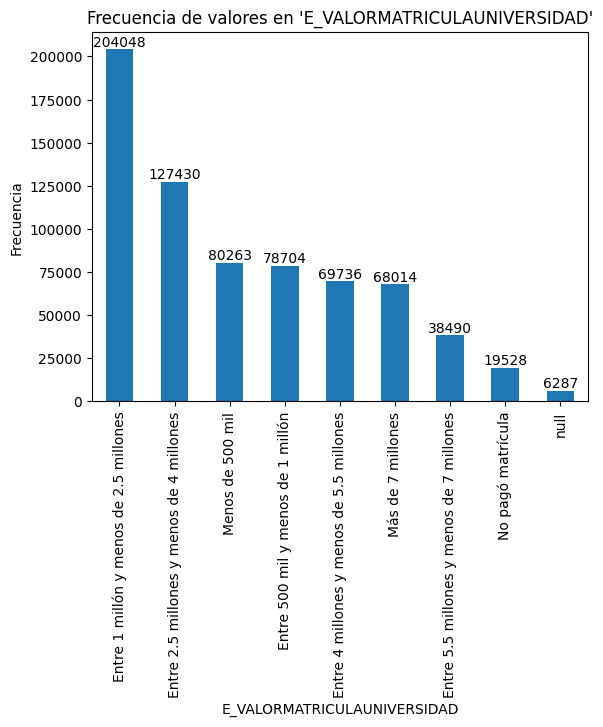

In [ ]:
viewValues(df, "E_VALORMATRICULAUNIVERSIDAD")

In [ ]:
fillDefault(df_clean, 'E_VALORMATRICULAUNIVERSIDAD', "No pagó matrícula")

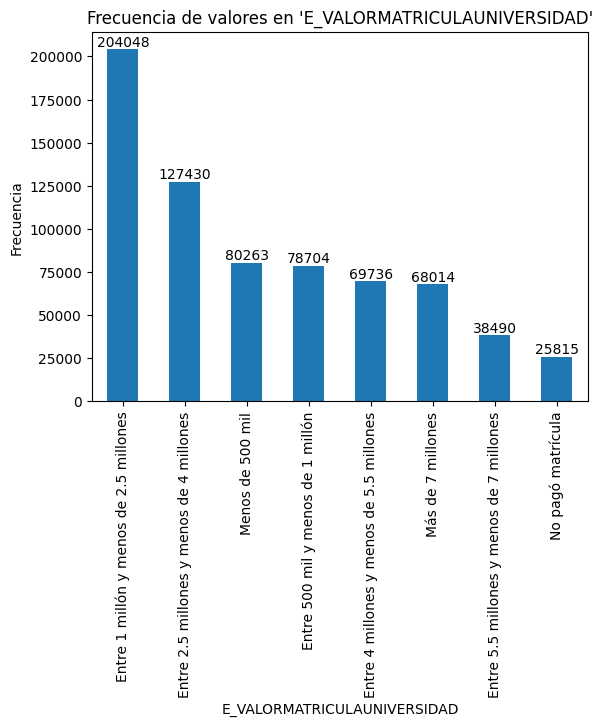

In [ ]:
viewValues(df_clean, 'E_VALORMATRICULAUNIVERSIDAD')

### E_HORASSEMANATRABAJA

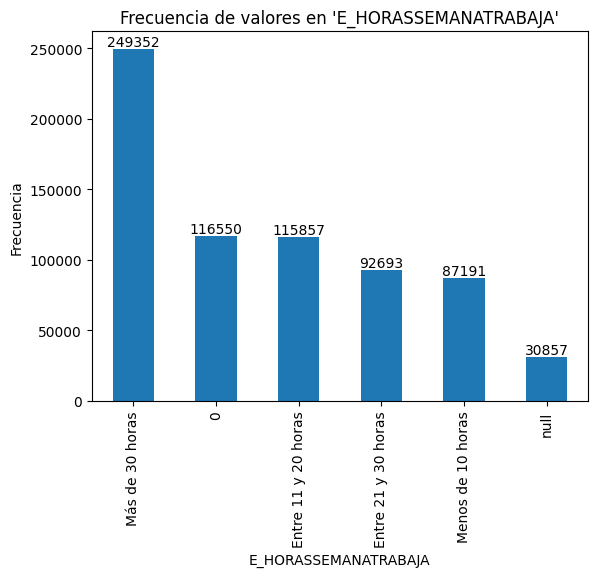

In [ ]:
viewValues(df, 'E_HORASSEMANATRABAJA')

In [ ]:
fillDefault(df_clean, 'E_HORASSEMANATRABAJA', "0")

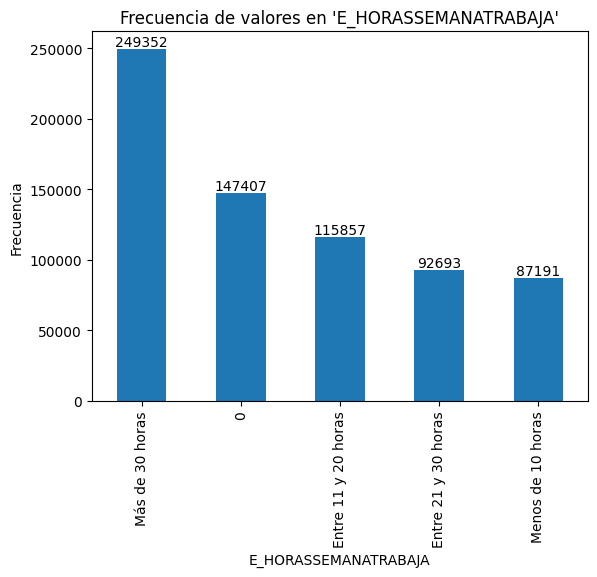

In [ ]:
viewValues(df_clean, 'E_HORASSEMANATRABAJA')

### F_ESTRATOVIVIENDA

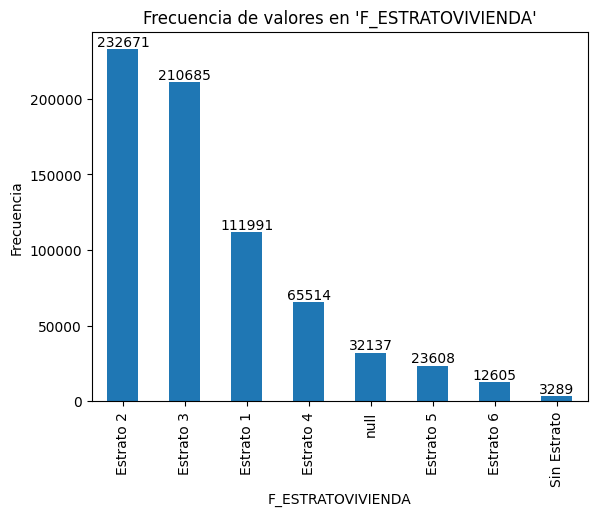

In [ ]:
viewValues(df, 'F_ESTRATOVIVIENDA')

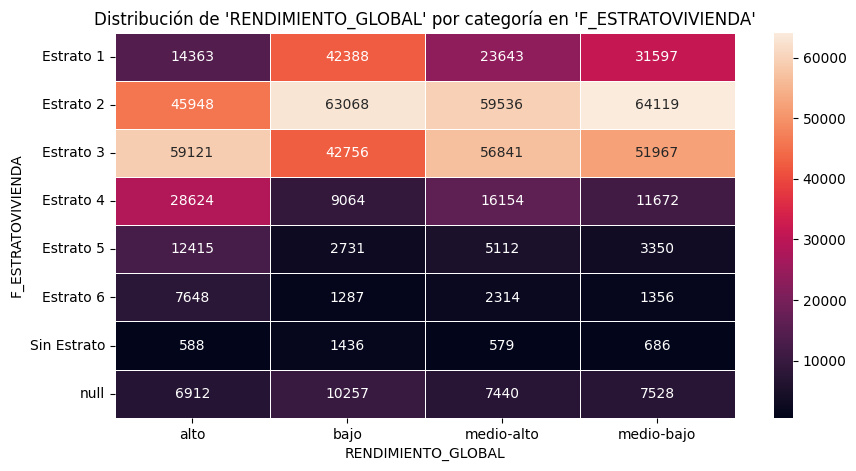

In [ ]:
compareDiscreteValues(df, 'F_ESTRATOVIVIENDA')

In [ ]:
columnValues = getDistincValues(df, 'F_ESTRATOVIVIENDA')
print(columnValues)

['Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1', 'Estrato 6', 'Sin Estrato']


In [ ]:
replaceNullByList(df_clean, 'F_ESTRATOVIVIENDA', columnValues)

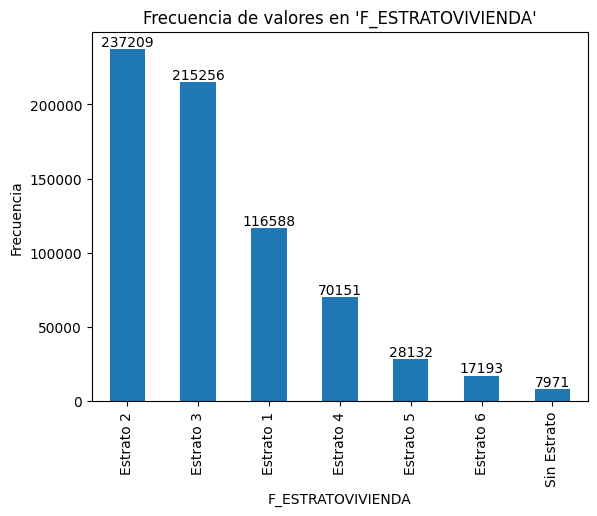

In [ ]:
viewValues(df_clean, 'F_ESTRATOVIVIENDA')

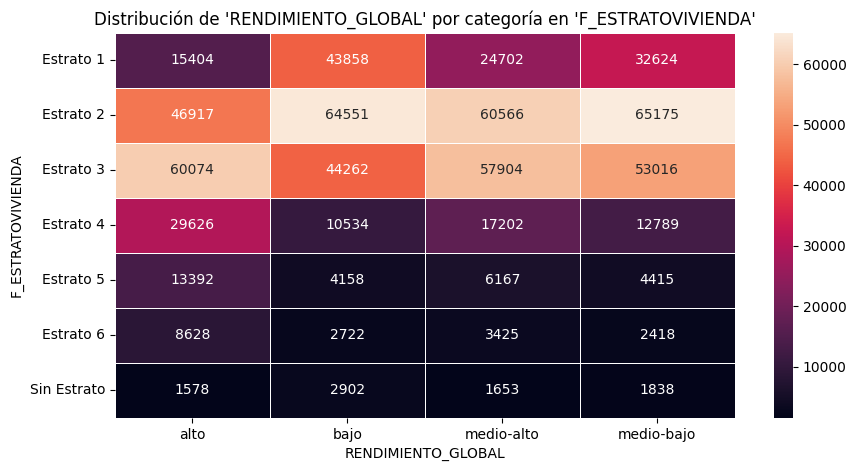

In [ ]:
compareDiscreteValues(df_clean, 'F_ESTRATOVIVIENDA')

### F_TIENEINTERNET

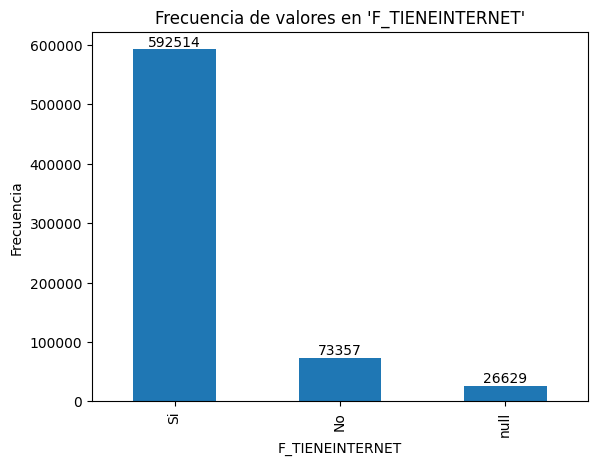

In [ ]:
viewValues(df, 'F_TIENEINTERNET')

In [ ]:
fillDefault(df_clean, 'F_TIENEINTERNET', "No")

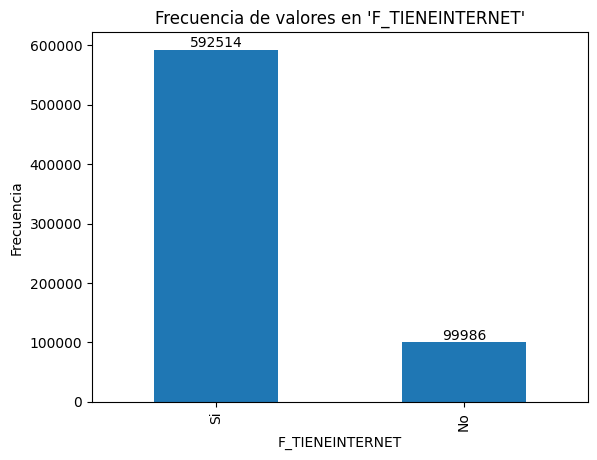

In [ ]:
viewValues(df_clean, 'F_TIENEINTERNET')

### F_EDUCACIONPADRE

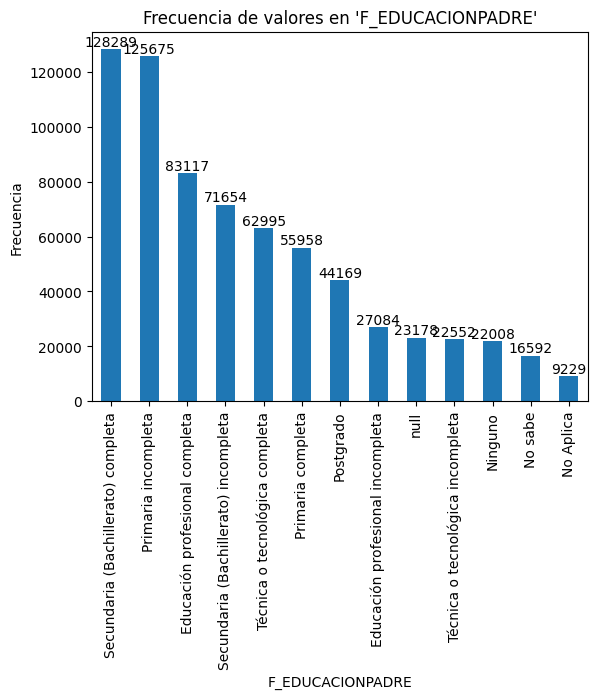

In [ ]:
viewValues(df, 'F_EDUCACIONPADRE')

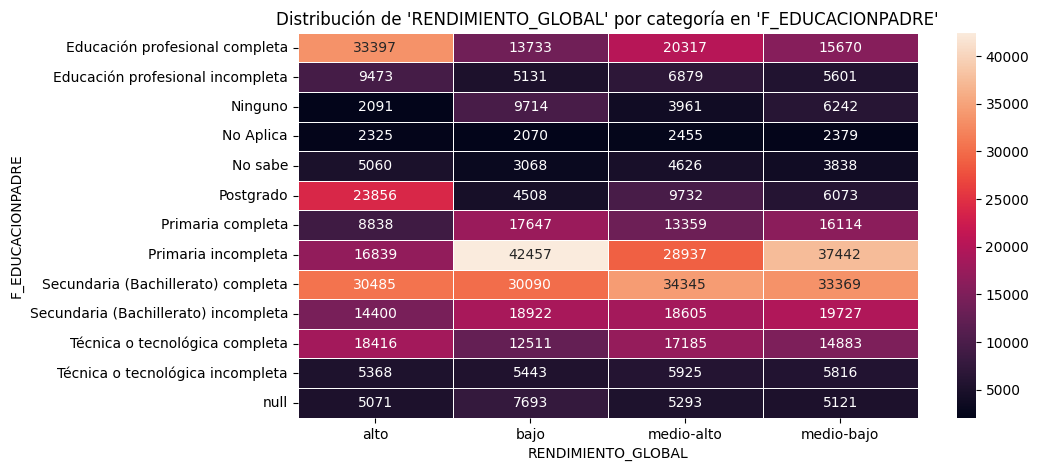

In [ ]:
compareDiscreteValues(df, 'F_EDUCACIONPADRE')

In [ ]:
columnValues = getDistincValues(df, 'F_EDUCACIONPADRE')
print(columnValues)

['Técnica o tecnológica incompleta', 'Técnica o tecnológica completa', 'Secundaria (Bachillerato) completa', 'No sabe', 'Primaria completa', 'Educación profesional completa', 'Educación profesional incompleta', 'Primaria incompleta', 'Postgrado', 'Secundaria (Bachillerato) incompleta', 'Ninguno', 'No Aplica']


In [ ]:
replaceNullByList(df_clean, 'F_EDUCACIONPADRE', columnValues)

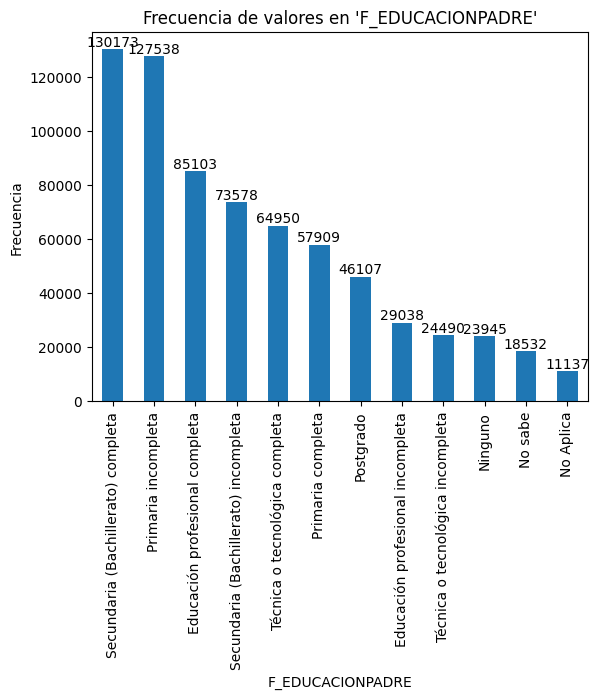

In [ ]:
viewValues(df_clean, 'F_EDUCACIONPADRE')

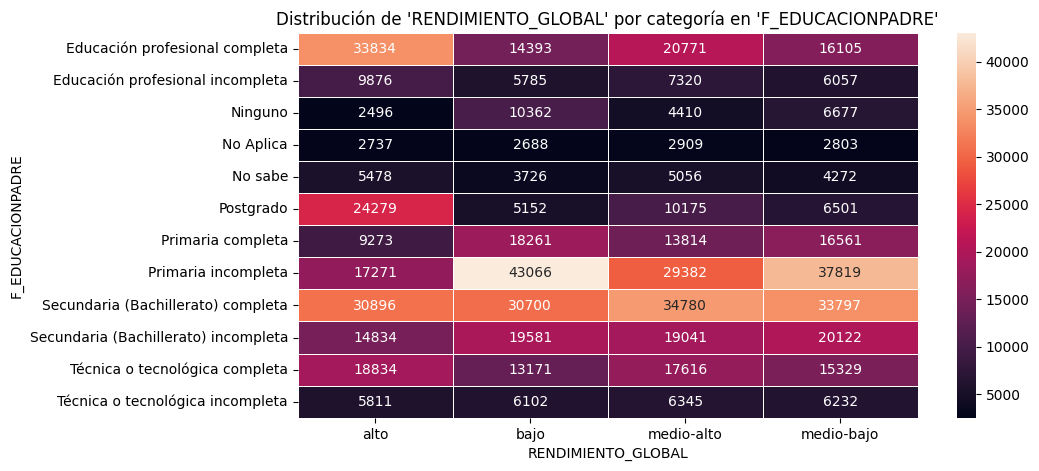

In [ ]:
compareDiscreteValues(df_clean, 'F_EDUCACIONPADRE')

### F_TIENELAVADORA

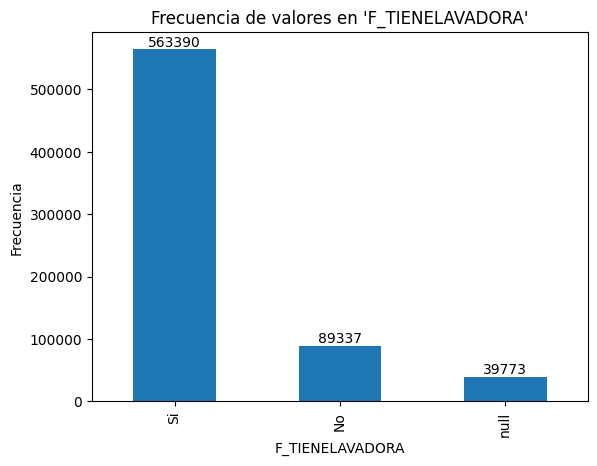

In [ ]:
viewValues(df, 'F_TIENELAVADORA')

In [ ]:
fillDefault(df_clean, 'F_TIENELAVADORA', "No")

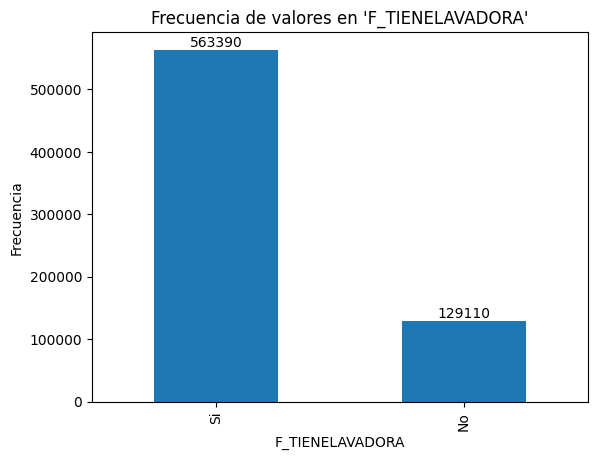

In [ ]:
viewValues(df_clean, 'F_TIENELAVADORA')

### F_TIENEAUTOMOVIL

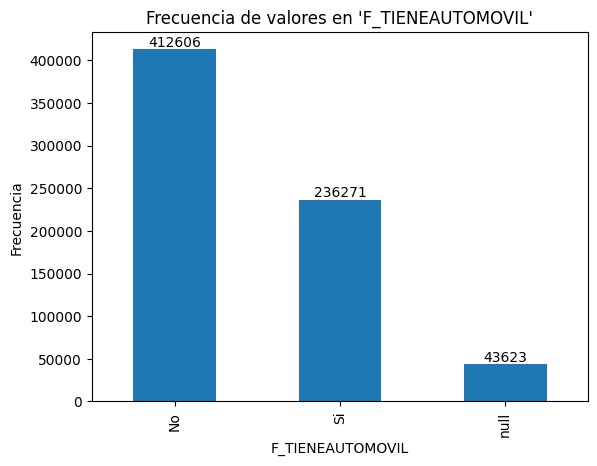

In [ ]:
viewValues(df, 'F_TIENEAUTOMOVIL')

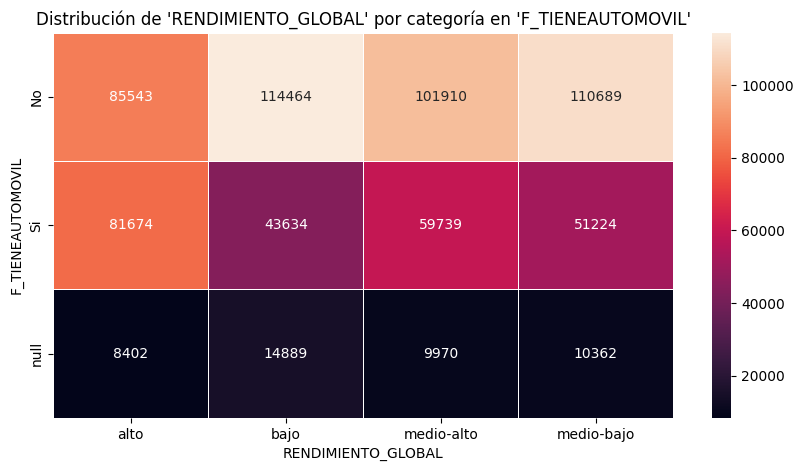

In [ ]:
compareDiscreteValues(df, 'F_TIENEAUTOMOVIL')

In [ ]:
columnValues = getDistincValues(df, 'F_TIENEAUTOMOVIL')
print(columnValues)

['Si', 'No']


In [ ]:
replaceNullByList(df_clean, 'F_TIENEAUTOMOVIL', columnValues)

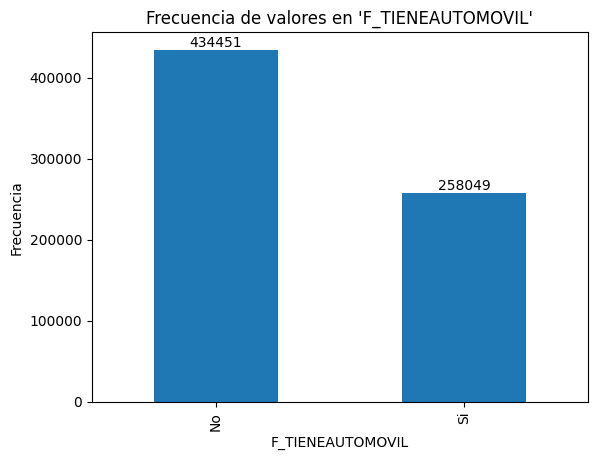

In [ ]:
viewValues(df_clean, 'F_TIENEAUTOMOVIL')

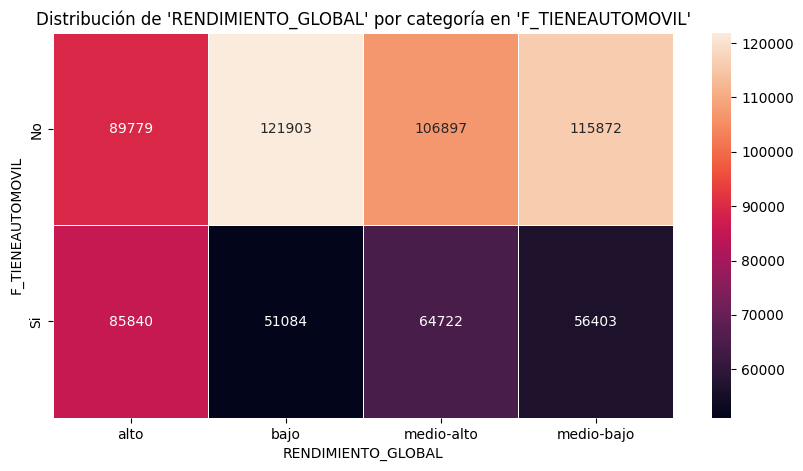

In [ ]:
compareDiscreteValues(df_clean, 'F_TIENEAUTOMOVIL')

### E_PAGOMATRICULAPROPIO

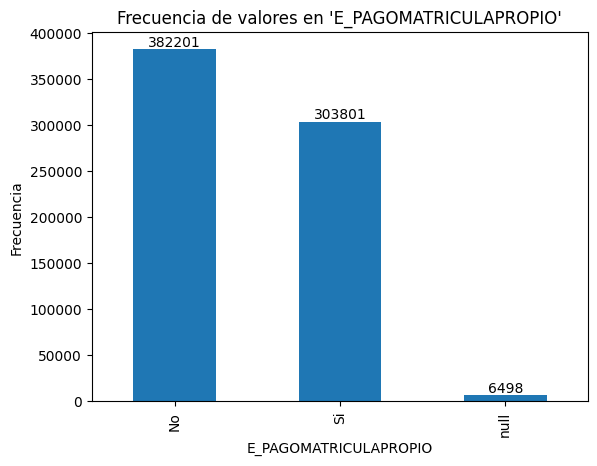

In [ ]:
viewValues(df, 'E_PAGOMATRICULAPROPIO')

In [ ]:
fillDefault(df_clean, 'E_PAGOMATRICULAPROPIO', "No")

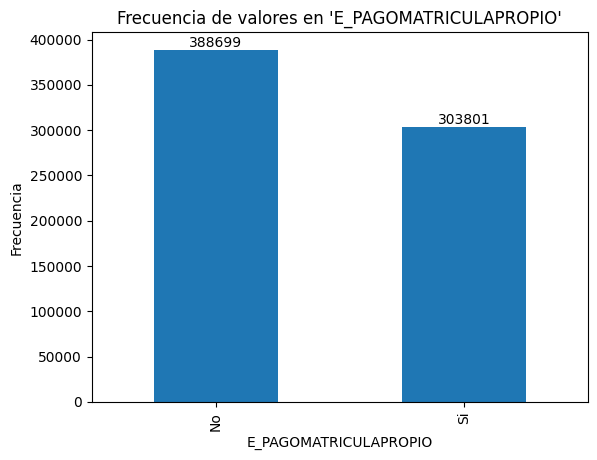

In [ ]:
viewValues(df_clean, 'E_PAGOMATRICULAPROPIO')

### F_TIENECOMPUTADOR

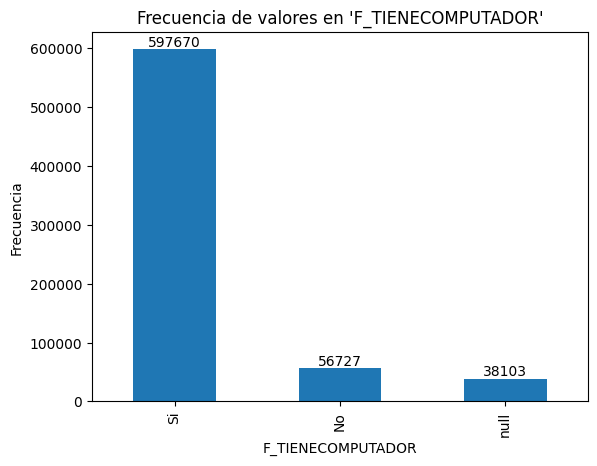

In [ ]:
viewValues(df, 'F_TIENECOMPUTADOR')

In [ ]:
fillDefault(df_clean, 'F_TIENECOMPUTADOR', "No")

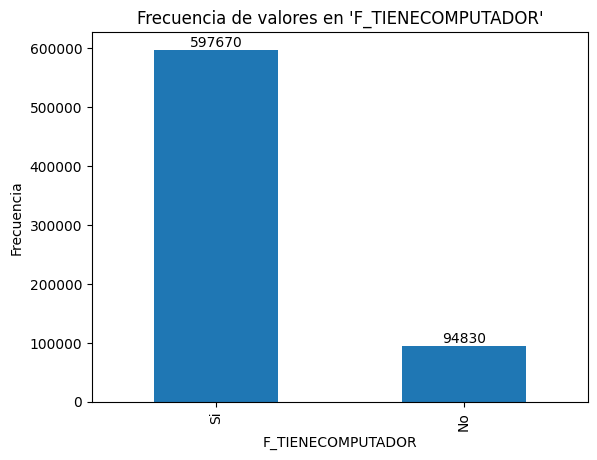

In [ ]:
viewValues(df_clean, 'F_TIENECOMPUTADOR')

### F_EDUCACIONMADRE

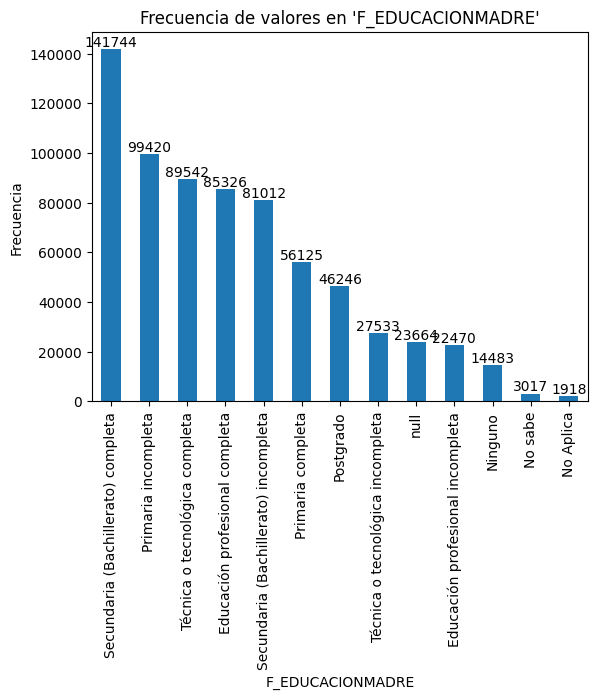

In [ ]:
viewValues(df, 'F_EDUCACIONMADRE')

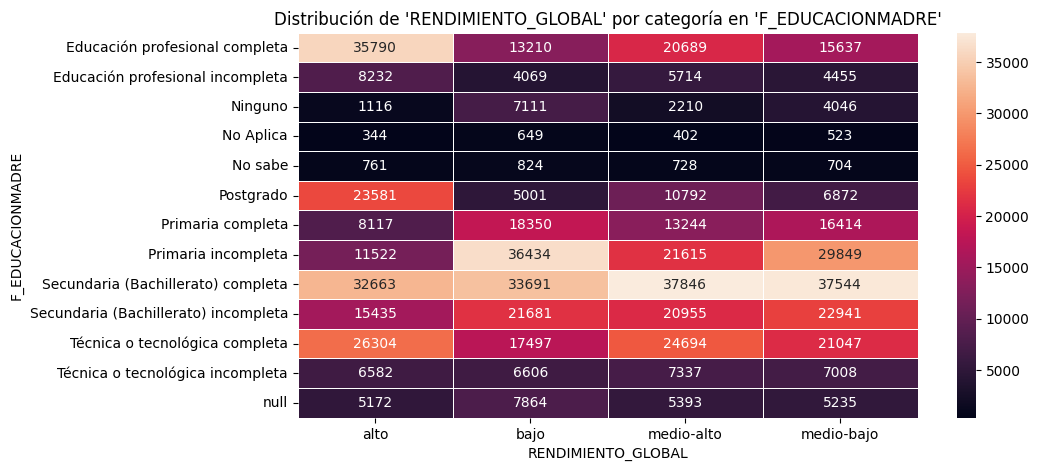

In [ ]:
compareDiscreteValues(df, 'F_EDUCACIONMADRE')

In [ ]:
columnValues = getDistincValues(df, 'F_EDUCACIONMADRE')
print(columnValues)

['Postgrado', 'Técnica o tecnológica incompleta', 'Secundaria (Bachillerato) completa', 'Primaria completa', 'Técnica o tecnológica completa', 'Secundaria (Bachillerato) incompleta', 'Educación profesional incompleta', 'Educación profesional completa', 'Primaria incompleta', 'Ninguno', 'No Aplica', 'No sabe']


In [ ]:
replaceNullByList(df_clean, 'F_EDUCACIONMADRE', columnValues)

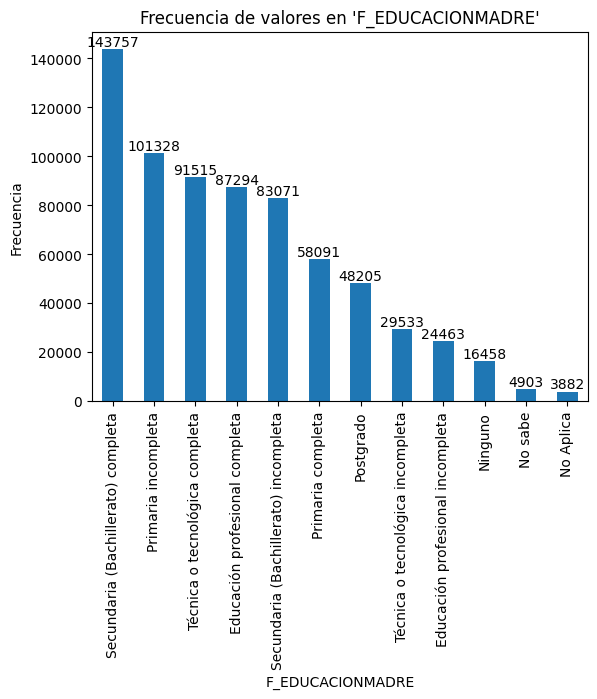

In [ ]:
viewValues(df_clean, 'F_EDUCACIONMADRE')

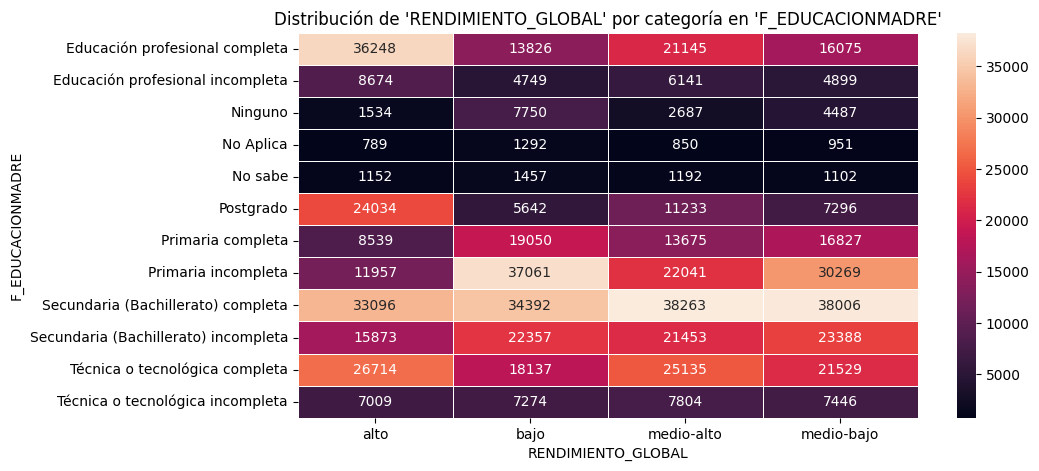

In [ ]:
compareDiscreteValues(df_clean,'F_EDUCACIONMADRE')

## **Manejo de valores categóricos**

In [ ]:
df_encoded = df_clean.copy()

### E_PRGM_ACADEMICO

In [ ]:
printUniqueValues(df_clean, 'E_PRGM_ACADEMICO', format=True)

['ENFERMERIA' 'DERECHO' 'MERCADEO Y PUBLICIDAD'
 'ADMINISTRACION DE EMPRESAS' 'PSICOLOGIA' 'MEDICINA VETERINARIA'
 'INGENIERIA MECANICA' 'ADMINISTRACION EN SALUD OCUPACIONAL'
 'INGENIERIA INDUSTRIAL' 'ADMINISTRACION FINANCIERA' 'HOTELERIA Y TURISMO'
 'LICENCIATURA EN CIENCIAS SOCIALES' 'LICENCIATURA EN PEDAGOGIA INFANTIL'
 'COMUNICACION SOCIAL' 'CIENCIA POLITICA'
 'PROFESIONAL EN GESTION DE LA SEGURIDAD Y LA SALUD LABORAL'
 'MAESTRO EN MUSICA' 'INGENIERIA MECATRONICA' 'TRABAJO SOCIAL'
 'LICENCIATURA EN BIOLOGIA Y EDUCACION AMBIENTAL' 'INGENIERIA CIVIL'
 'CONTADURIA PUBLICA' 'ADMINISTRACION EN SALUD' 'ESTADISTICA'
 'LICENCIATURA EN BIOLOGIA' 'INGENIERIA AGROINDUSTRIAL' 'ZOOTECNIA'
 'COMUNICACION AUDIOVISUAL'
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES-INGLES'
 'COMUNICACION SOCIAL  - PERIODISMO' 'SEGURIDAD Y SALUD EN EL TRABAJO'
 'MEDICINA' 'ADMINISTRACION DE LA SEGURIDAD SOCIAL' 'ODONTOLOGIA'
 'DISENO INDUSTRIAL' 'ECONOMIA' 'INGENIERIA DE PROCESOS INDUSTRIALES'
 'INGE

In [ ]:
pd.set_option('display.max_rows', 500)
valuesfiltered = valuesFilterSignificance(df_clean, 'E_PRGM_ACADEMICO', 0.5)

E_PRGM_ACADEMICO
ADMINISTRACION DE EMPRESAS                    11.07
DERECHO                                        7.69
CONTADURIA PUBLICA                             7.49
PSICOLOGIA                                     7.12
INGENIERIA INDUSTRIAL                          5.02
INGENIERIA CIVIL                               3.02
MEDICINA                                       2.61
INGENIERIA DE SISTEMAS                         2.60
LICENCIATURA EN PEDAGOGIA INFANTIL             2.13
INGENIERIA AMBIENTAL                           1.88
TRABAJO SOCIAL                                 1.83
ENFERMERIA                                     1.76
ARQUITECTURA                                   1.66
ADMINISTRACION EN SALUD OCUPACIONAL            1.59
NEGOCIOS INTERNACIONALES                       1.28
ECONOMIA                                       1.09
INGENIERIA MECANICA                            1.05
INGENIERIA ELECTRONICA                         0.98
COMUNICACION SOCIAL                            

In [ ]:
groupValuesByPercentage(df_encoded, 'E_PRGM_ACADEMICO', 0.5, 'OTROS')

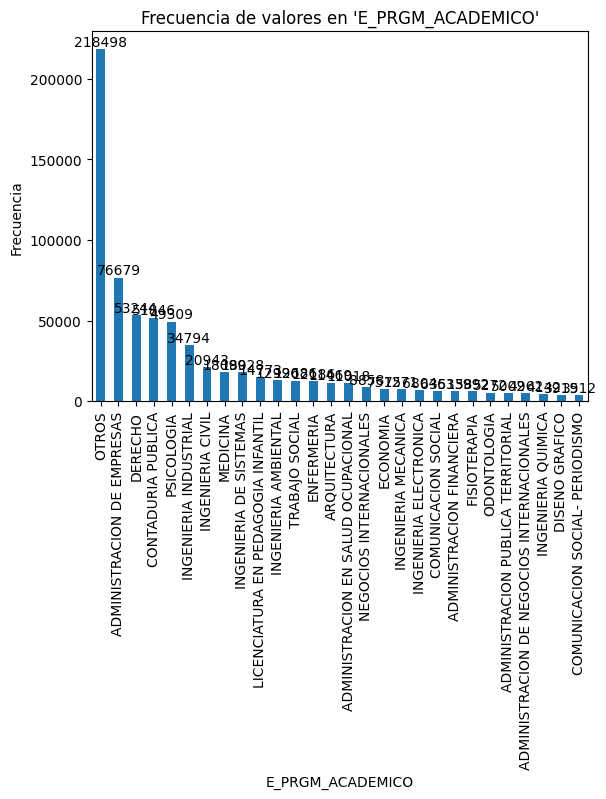

In [ ]:
viewValues(df_encoded, 'E_PRGM_ACADEMICO')

In [ ]:
df_encoded = onehotEncode(df_encoded, 'E_PRGM_ACADEMICO')

In [ ]:
percentagePositives(df_encoded)

ID                                                             49460613.06
PERIODO_ACADEMICO                                               2019836.67
INDICADOR_1                                                          26.86
INDICADOR_2                                                          26.00
INDICADOR_3                                                          26.21
INDICADOR_4                                                          26.29
E_PRGM_ACADEMICO_ENFERMERIA                                           1.76
E_PRGM_ACADEMICO_DERECHO                                              7.69
E_PRGM_ACADEMICO_OTROS                                               31.55
E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS                          11.07
E_PRGM_ACADEMICO_PSICOLOGIA                                           7.12
E_PRGM_ACADEMICO_INGENIERIA MECANICA                                  1.05
E_PRGM_ACADEMICO_ADMINISTRACION EN SALUD OCUPACIONAL                  1.59
E_PRGM_ACADEMICO_INGENIER

### E_PRGM_DEPARTAMENTO

In [ ]:
valuesPercentage(df_clean, 'E_PRGM_DEPARTAMENTO')

,proportion
E_PRGM_DEPARTAMENTO,
BOGOTA,40.74
ANTIOQUIA,12.07
VALLE,6.44
ATLANTICO,5.92
SANTANDER,4.16
NORTE SANTANDER,3.26
BOLIVAR,2.98
BOYACA,2.03
CUNDINAMARCA,2.02


In [ ]:
df_encoded = onehotEncode(df_encoded, 'E_PRGM_DEPARTAMENTO')

In [ ]:
percentagePositives(df_encoded)

ID                                                             49460613.06
PERIODO_ACADEMICO                                               2019836.67
INDICADOR_1                                                          26.86
INDICADOR_2                                                          26.00
INDICADOR_3                                                          26.21
INDICADOR_4                                                          26.29
E_PRGM_ACADEMICO_ENFERMERIA                                           1.76
E_PRGM_ACADEMICO_DERECHO                                              7.69
E_PRGM_ACADEMICO_OTROS                                               31.55
E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS                          11.07
E_PRGM_ACADEMICO_PSICOLOGIA                                           7.12
E_PRGM_ACADEMICO_INGENIERIA MECANICA                                  1.05
E_PRGM_ACADEMICO_ADMINISTRACION EN SALUD OCUPACIONAL                  1.59
E_PRGM_ACADEMICO_INGENIER

### F_TIENEINTERNET

In [ ]:
replaceBinaryValues("Si", "No", df_encoded, 'F_TIENEINTERNET')

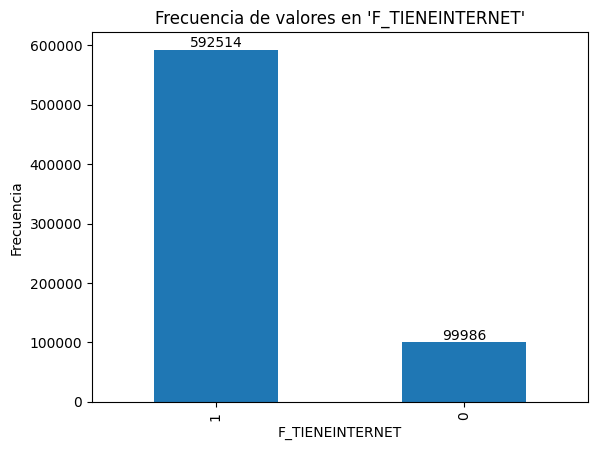

In [ ]:
viewValues(df_encoded, 'F_TIENEINTERNET')

### F_EDUCACIONPADRE

In [ ]:
groupValuesByList(df_encoded, 'F_EDUCACIONPADRE', ['Ninguno', 'No sabe','No Aplica'], 'Ninguno')

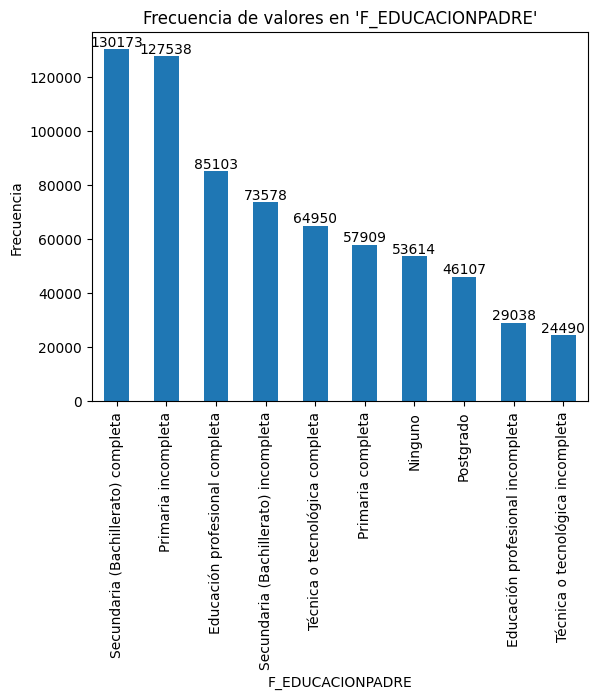

In [ ]:
viewValues(df_encoded, 'F_EDUCACIONPADRE')

In [ ]:
df_encoded = onehotEncode(df_encoded, 'F_EDUCACIONPADRE')

In [ ]:
percentagePositives(df_encoded)

ID                                                             49460613.06
PERIODO_ACADEMICO                                               2019836.67
F_TIENEINTERNET                                                      85.56
INDICADOR_1                                                          26.86
INDICADOR_2                                                          26.00
INDICADOR_3                                                          26.21
INDICADOR_4                                                          26.29
E_PRGM_ACADEMICO_ENFERMERIA                                           1.76
E_PRGM_ACADEMICO_DERECHO                                              7.69
E_PRGM_ACADEMICO_OTROS                                               31.55
E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS                          11.07
E_PRGM_ACADEMICO_PSICOLOGIA                                           7.12
E_PRGM_ACADEMICO_INGENIERIA MECANICA                                  1.05
E_PRGM_ACADEMICO_ADMINIST

### F_TIENELAVADORA

In [ ]:
replaceBinaryValues("Si", "No", df_encoded, 'F_TIENELAVADORA')

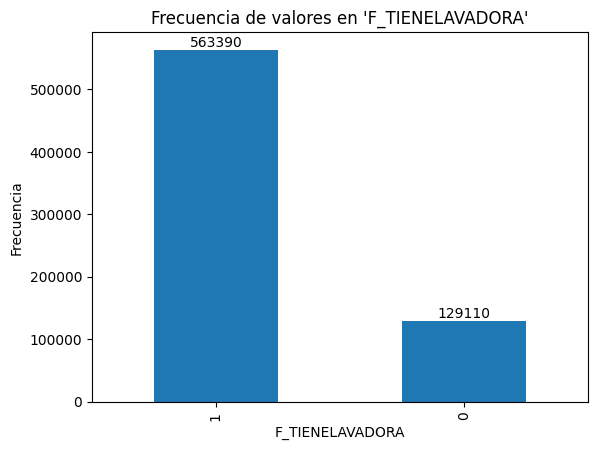

In [ ]:
viewValues(df_encoded, 'F_TIENELAVADORA')

### F_TIENEAUTOMOVIL

In [ ]:
replaceBinaryValues("Si", "No", df_encoded, 'F_TIENEAUTOMOVIL')

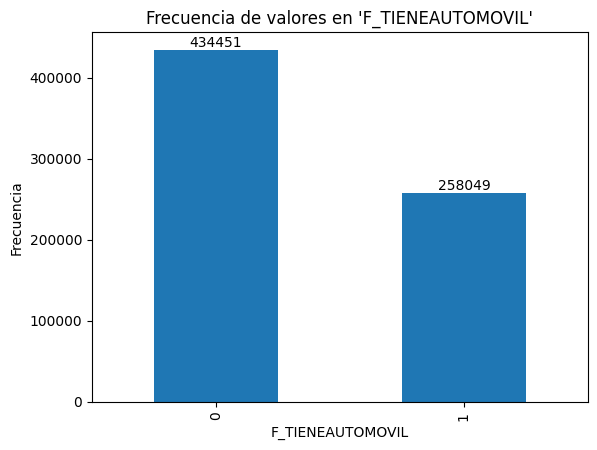

In [ ]:
viewValues(df_encoded, 'F_TIENEAUTOMOVIL')

### E_PRIVADO_LIBERTAD

In [ ]:
replaceBinaryValues("S", "N", df_encoded, 'E_PRIVADO_LIBERTAD')

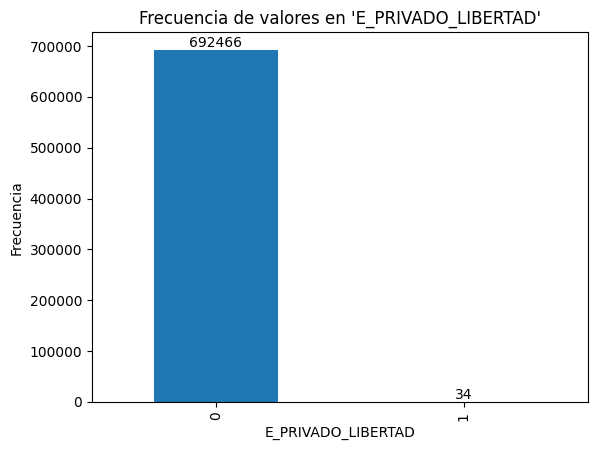

In [ ]:
viewValues(df_encoded, 'E_PRIVADO_LIBERTAD')

### E_PAGOMATRICULAPROPIO

In [ ]:
replaceBinaryValues("Si", "No", df_encoded, 'E_PAGOMATRICULAPROPIO')

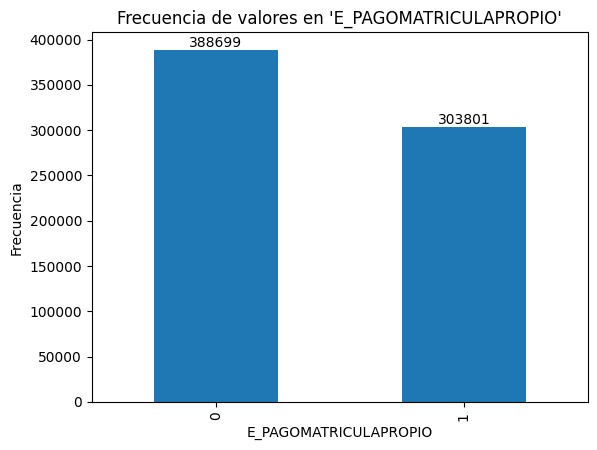

In [ ]:
viewValues(df_encoded, 'E_PAGOMATRICULAPROPIO')

### F_TIENECOMPUTADOR

In [ ]:
replaceBinaryValues("Si", "No", df_encoded, 'F_TIENECOMPUTADOR')

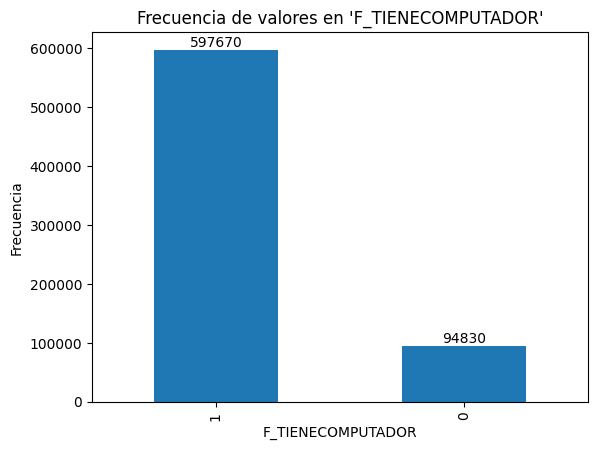

In [ ]:
viewValues(df_encoded, 'F_TIENECOMPUTADOR')

### F_EDUCACIONMADRE

In [ ]:
valuesPercentage(df_clean, 'F_EDUCACIONMADRE')

,proportion
F_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,20.76
Primaria incompleta,14.63
Tecnica o tecnologica completa,13.22
Educacion profesional completa,12.61
Secundaria (Bachillerato) incompleta,12.00
Primaria completa,8.39
Postgrado,6.96
Tecnica o tecnologica incompleta,4.26
Educacion profesional incompleta,3.53


In [ ]:
groupValuesByList(df_encoded, 'F_EDUCACIONMADRE', ['Ninguno', 'No sabe','No Aplica'], 'Ninguno')

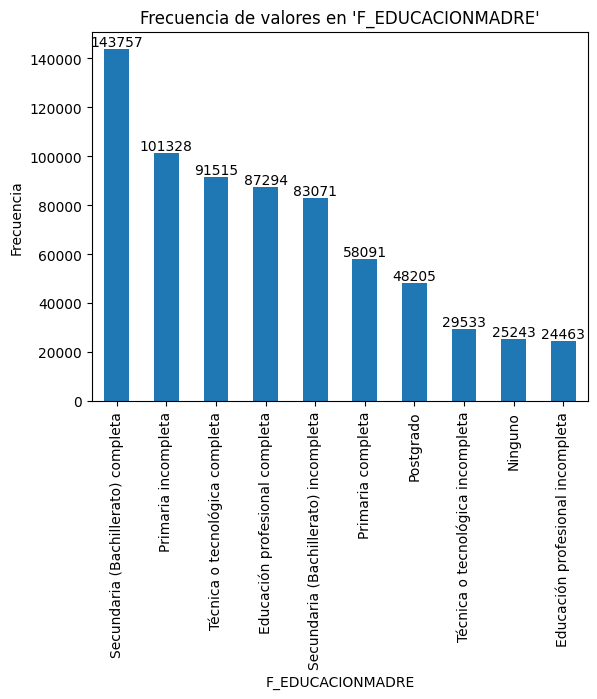

In [ ]:
viewValues(df_encoded, 'F_EDUCACIONMADRE')

In [ ]:
df_encoded = onehotEncode(df_encoded, 'F_EDUCACIONMADRE')

In [ ]:
percentagePositives(df_encoded)

ID                                                             49460613.06
PERIODO_ACADEMICO                                               2019836.67
F_TIENEINTERNET                                                      85.56
F_TIENELAVADORA                                                      81.36
F_TIENEAUTOMOVIL                                                     37.26
E_PRIVADO_LIBERTAD                                                    0.00
E_PAGOMATRICULAPROPIO                                                43.87
F_TIENECOMPUTADOR                                                    86.31
INDICADOR_1                                                          26.86
INDICADOR_2                                                          26.00
INDICADOR_3                                                          26.21
INDICADOR_4                                                          26.29
E_PRGM_ACADEMICO_ENFERMERIA                                           1.76
E_PRGM_ACADEMICO_DERECHO 

### E_VALORMATRICULAUNIVERSIDAD

In [ ]:
getDistincValues(df_clean, 'E_VALORMATRICULAUNIVERSIDAD')

['Entre 5.5 millones y menos de 7 millones',
 'Entre 2.5 millones y menos de 4 millones',
 'Entre 4 millones y menos de 5.5 millones',
 'Más de 7 millones',
 'Entre 1 millón y menos de 2.5 millones',
 'Entre 500 mil y menos de 1 millón',
 'Menos de 500 mil',
 'No pagó matrícula']

In [ ]:
valuesDict = {
    'No pagó matrícula': 0,
    'Menos de 500 mil': 1,
    'Entre 500 mil y menos de 1 millón': 2,
    'Entre 1 millón y menos de 2.5 millones': 3,
    'Entre 2.5 millones y menos de 4 millones': 4,
    'Entre 4 millones y menos de 5.5 millones': 5,
    'Entre 5.5 millones y menos de 7 millones': 6,
    'Más de 7 millones': 7
}

replaceDiscreteValues(valuesDict, df_encoded, 'E_VALORMATRICULAUNIVERSIDAD')

/tmp/ipython-input-1487576509.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(replaceDict)


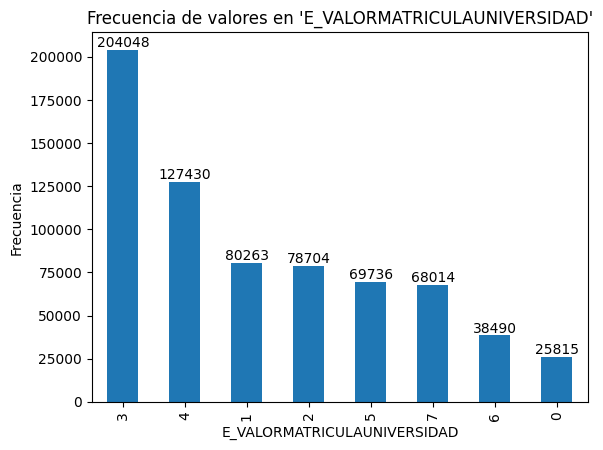

In [ ]:
viewValues(df_encoded, 'E_VALORMATRICULAUNIVERSIDAD')

### E_HORASSEMANATRABAJA

In [ ]:
dictValues={
  '0':0,
  'Menos de 10 horas':1,
  'Entre 11 y 20 horas':2,
  'Entre 21 y 30 horas':3,
  'Más de 30 horas':4
}

replaceDiscreteValues(dictValues, df_encoded, 'E_HORASSEMANATRABAJA')

/tmp/ipython-input-1487576509.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(replaceDict)


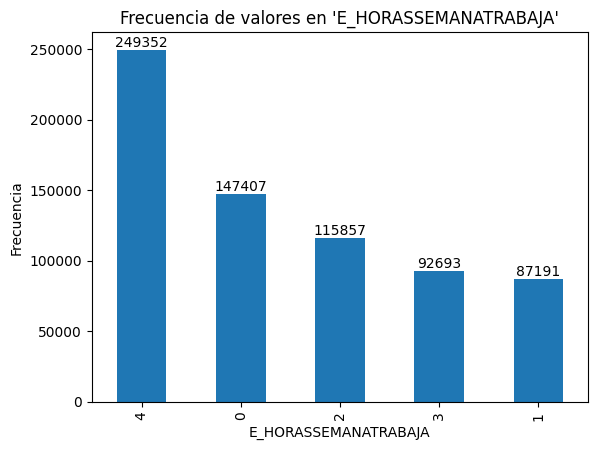

In [ ]:
viewValues(df_encoded, 'E_HORASSEMANATRABAJA')

### F_ESTRATOVIVIENDA

In [ ]:
dictValues = {
    'Sin Estrato': 0,
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6
}

replaceDiscreteValues(dictValues, df_encoded, 'F_ESTRATOVIVIENDA')

/tmp/ipython-input-1487576509.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(replaceDict)


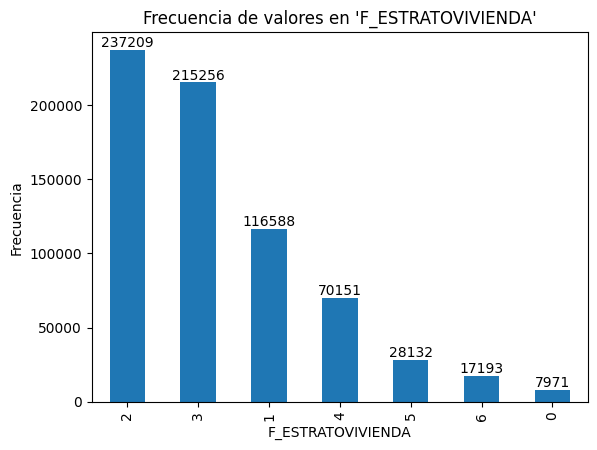

In [ ]:
viewValues(df_encoded, 'F_ESTRATOVIVIENDA')

### PERIODO_ACADEMICO

In [ ]:
dictPeriodos = {
    20183: 0,
    20184: 1,
    20194: 2,
    20195: 3,
    20196: 4,
    20202: 5,
    20203: 6,
    20212: 7,
    20213: 8
}

replaceDiscreteValues(dictPeriodos, df_encoded, 'PERIODO_ACADEMICO')

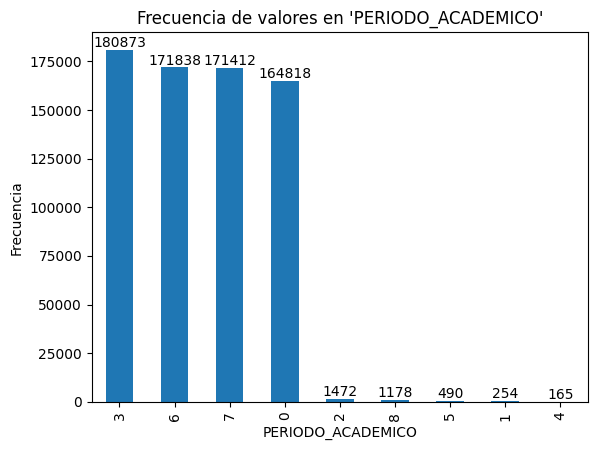

In [ ]:
viewValues(df_encoded, 'PERIODO_ACADEMICO')

### RENDIMIENTO_GLOBAL

In [ ]:
dictValues = {
    'bajo': 1,
    'medio-bajo': 2,
    'medio-alto': 3,
    'alto': 4
}

replaceDiscreteValues(dictValues, df_encoded, 'RENDIMIENTO_GLOBAL')

/tmp/ipython-input-1487576509.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(replaceDict)


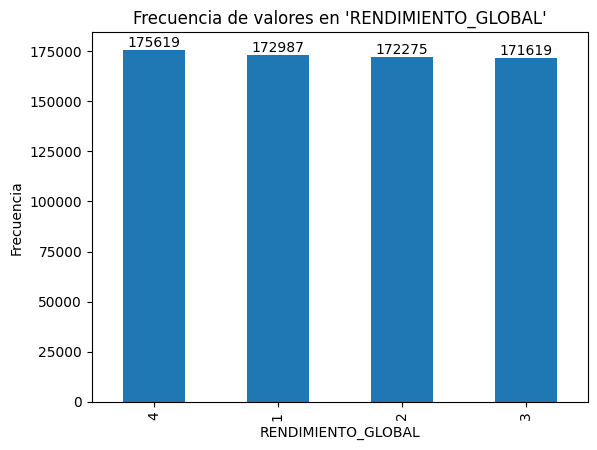

In [ ]:
viewValues(df_encoded, 'RENDIMIENTO_GLOBAL')

## **Eliminación de duplicados**

In [ ]:
df_final = df_encoded.copy()

### F_TIENEINTERNET.1

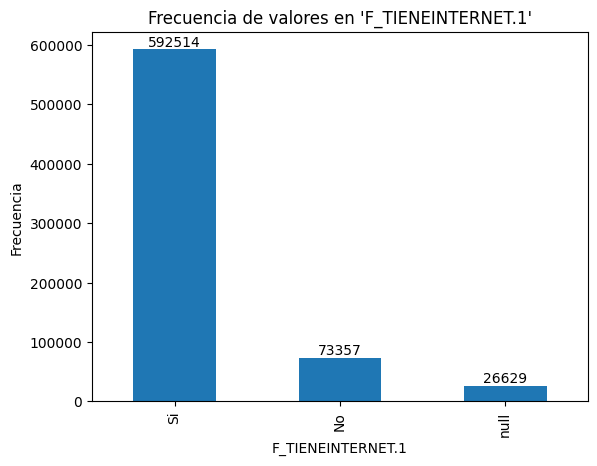

In [ ]:
viewValues(df,'F_TIENEINTERNET.1')

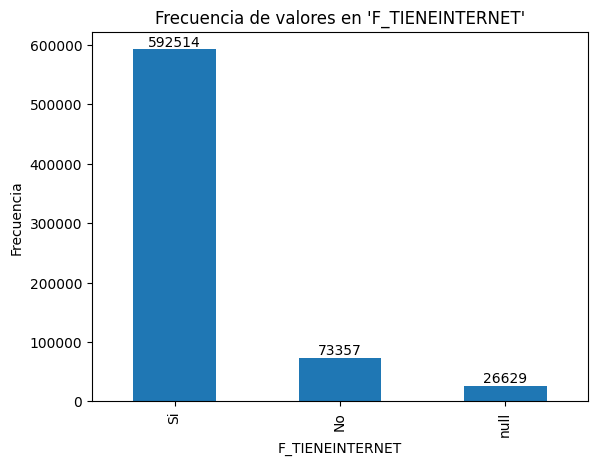

In [ ]:
viewValues(df,'F_TIENEINTERNET')

In [ ]:
df['F_TIENEINTERNET.1'].equals(df['F_TIENEINTERNET'])

True

In [ ]:
df_final.drop('F_TIENEINTERNET.1',axis=1,  inplace=True)

## **Dataset final y exportación**

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 95 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   ID                                                           692500 non-null  int64  
 1   PERIODO_ACADEMICO                                            692500 non-null  int64  
 2   E_VALORMATRICULAUNIVERSIDAD                                  692500 non-null  int64  
 3   E_HORASSEMANATRABAJA                                         692500 non-null  int64  
 4   F_ESTRATOVIVIENDA                                            692500 non-null  int64  
 5   F_TIENEINTERNET                                              692500 non-null  int64  
 6   F_TIENELAVADORA                                              692500 non-null  int64  
 7   F_TIENEAUTOMOVIL                                             6925

In [ ]:
df_final.head()

,ID,PERIODO_ACADEMICO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,F_EDUCACIONMADRE_Postgrado,F_EDUCACIONMADRE_Técnica o tecnológica incompleta,F_EDUCACIONMADRE_Secundaria (Bachillerato) completa,F_EDUCACIONMADRE_Primaria completa,F_EDUCACIONMADRE_Técnica o tecnológica completa,F_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,F_EDUCACIONMADRE_Educación profesional incompleta,F_EDUCACIONMADRE_Educación profesional completa,F_EDUCACIONMADRE_Primaria incompleta,F_EDUCACIONMADRE_Ninguno
0,904256,7,6,1,3,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,645256,7,4,0,3,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,308367,6,4,4,3,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,470353,3,5,0,4,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,989032,7,4,3,3,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_final.to_csv("dataset_limpio.csv", index=False)